<a href="https://colab.research.google.com/github/darishkhan/Numerical-Linear-Algebra-Lab/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# all the necessary libraries
from PIL import Image
import numpy as np
import sklearn.decomposition as skd
import matplotlib.pyplot as plt

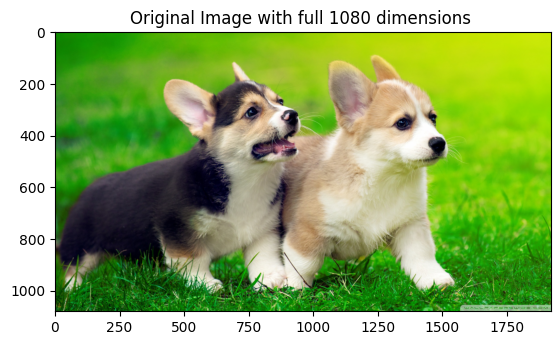

Shape of image matrix:  (1080, 1920, 3)


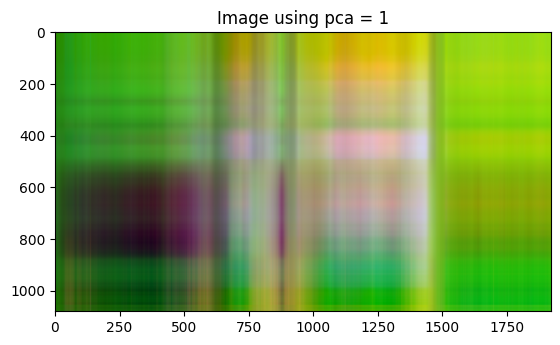

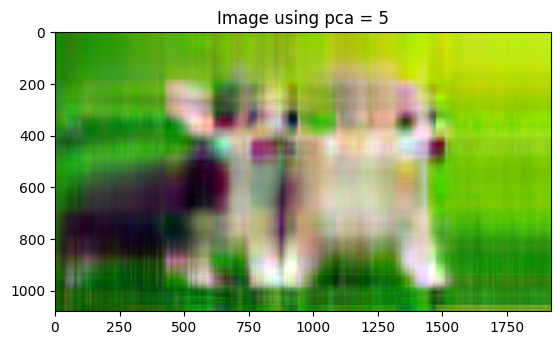

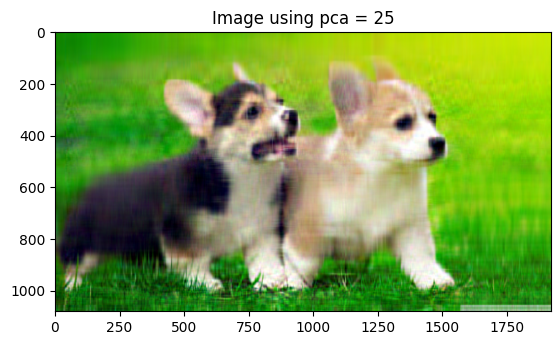

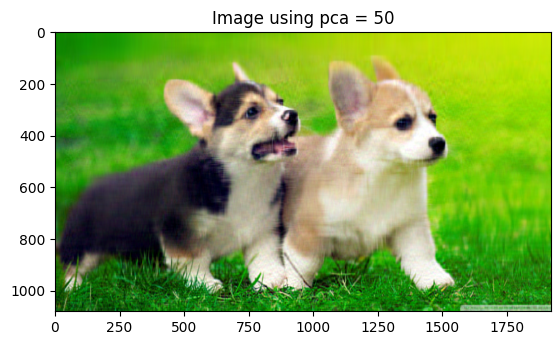

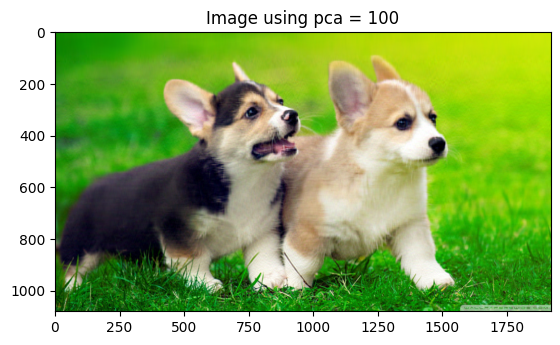

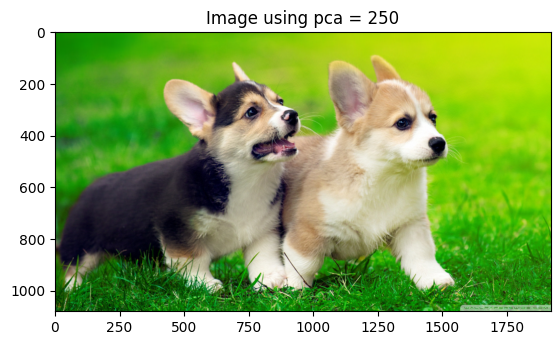

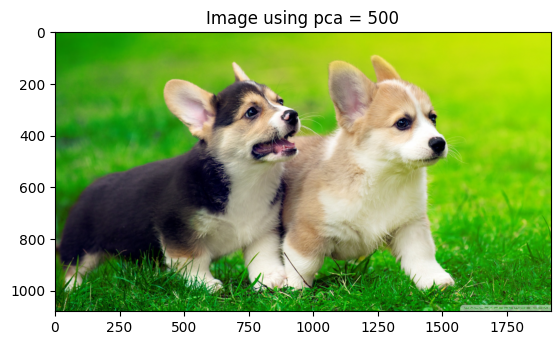

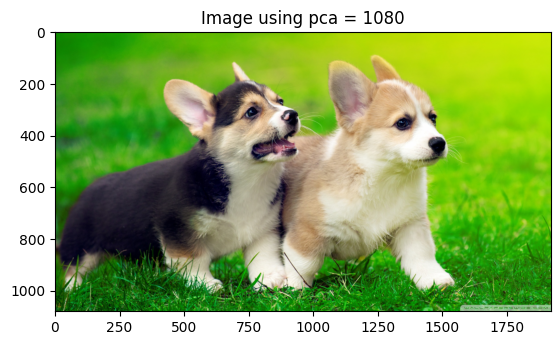

In [ ]:
# open image and convert to a matrix
im = Image.open("/content/drive/MyDrive/Image For Compression.jpg")
img_arr = np.array(im)

#original image
plt.title("Original Image with full 1080 dimensions ")
plt.imshow(img_arr)
plt.show()

#shape of the image matrix
print("Shape of image matrix: ", np.shape(img_arr))

#seperating the colour channels
red, blue, green = img_arr[:,:,0], img_arr[:,:,1], img_arr[:, :, 2]

#scaling up the values
scaled_red, scaled_blue, scaled_green = (red)/255, (blue)/255, (green)/255


for i in ([1, 5, 25, 50, 100, 250, 500, 1080]):
  #applying PCA on red channel
  pca_r = skd.PCA(n_components = i)
  pca_r.fit(scaled_red)
  trans_r = pca_r.transform(scaled_red)

  #applying PCA on blue channel
  pca_b = skd.PCA(n_components = i)
  pca_b.fit(scaled_blue)
  trans_b = pca_b.transform(scaled_blue)

  #applying PCA on green channel
  pca_g = skd.PCA(n_components = i)
  pca_g.fit(scaled_green)
  trans_g = pca_g.transform(scaled_green)

  # Inverse transforming the arrays
  final_b = pca_b.inverse_transform(trans_b)
  final_g = pca_g.inverse_transform(trans_g)
  final_r = pca_r.inverse_transform(trans_r)

  # combining the channels
  reduced_img = np.zeros((1080, 1920, 3))
  reduced_img[:,:,0], reduced_img[:,:,1], reduced_img[:,:,2] = final_r, final_b, final_g

  # displaying the image
  plt.title("Image using pca = "+str(i))
  plt.imshow(reduced_img)
  plt.show()

In [ ]:
# function to calculate the dominant eigenvalue by power method
def SelfPower_m(A, x0, maxNumIter, tol=1e-8):
  lamda = 0
  i = 0
  x_ = x0/np.linalg.norm(x0, 2)
  prevlamda = 1e15

  while(i < maxNumIter):
    p = A@x_
    p_ = p/np.linalg.norm(p, 2)
    lamda = np.dot(x_, p)
    # breaking condition
    if(abs(lamda-prevlamda)<tol*abs(lamda)):
      break
    i+=1
    x_=p_
    prevlamda = lamda
  print("Actual Iterations done = ",i)
  return lamda

In [ ]:
A =[[17, 24, 1, 8, 15],
    [23, 5, 7, 14, 16],
    [4, 6, 13, 20, 22],
    [10, 12, 19, 21, 3],
    [11, 18, 25, 2, 8]]
x0 = np.random.random_sample((len(A)))

print("A =\n", A)
print("x0 =\n", x0)
print("\nMax eigen value ")
print("by in-built eig command: ", (np.real(np.linalg.eig(A)[0])).max())
for iters in ([1, 2, 3, 4, 5, 10, 30, 50, 80, 100]):
  x = SelfPower_m(A, x0, iters)
  print("by Power function with maxNumIter("+str(iters)+"): ", x, "\n")


A =
 [[17, 24, 1, 8, 15], [23, 5, 7, 14, 16], [4, 6, 13, 20, 22], [10, 12, 19, 21, 3], [11, 18, 25, 2, 8]]
x0 =
 [0.46933185 0.63084983 0.04331399 0.05707183 0.13145559]

Max eigen value 
by in-built eig command:  64.80240648078454
Actual Iterations done =  1
by Power function with maxNumIter(1):  41.49095177754517 

Actual Iterations done =  2
by Power function with maxNumIter(2):  60.779530739784796 

Actual Iterations done =  3
by Power function with maxNumIter(3):  64.33652834941401 

Actual Iterations done =  4
by Power function with maxNumIter(4):  64.7544844684318 

Actual Iterations done =  5
by Power function with maxNumIter(5):  64.79671528686337 

Actual Iterations done =  9
by Power function with maxNumIter(10):  64.80240756035735 

Actual Iterations done =  9
by Power function with maxNumIter(30):  64.80240756035735 

Actual Iterations done =  9
by Power function with maxNumIter(50):  64.80240756035735 

Actual Iterations done =  9
by Power function with maxNumIter(80):  6

In [ ]:
# function to calculate all the eigen values
def SelfQRIter_m(A, maxNumIter, tol = 1e-8):
  iters=0
  while(iters<maxNumIter):
    Q, R = np.linalg.qr(A)
    An = R@Q
    if(np.linalg.norm(An - A, 'fro')<tol):
      break
    A = An
    iters+=1

  # defining an empty spectral list
  spectral_set = list()
  for i in range(np.shape(An)[0]):
    spectral_set.append(An[i,i])
  return spectral_set


In [ ]:
A =[[17, 24, 1, 8, 15],
    [23, 5, 7, 14, 16],
    [4, 6, 13, 20, 22],
    [10, 12, 19, 21, 3],
    [11, 18, 25, 2, 8]]
j = SelfQRIter_m(A, 200)
j.sort()
print("Eigenvalues by our function : \n",j)
k = np.linalg.eig(A)[0]
k.sort()
print("\nEigenvalues by eig function : \n", k)

Eigenvalues by our function : 
 [-21.694895573341594, -13.153980313700698, 12.74110757378234, 21.30536183247536, 64.80240648078453]

Eigenvalues by eig function : 
 [-21.67869636 -13.1557329   12.74286016  21.28916262  64.80240648]
